### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


#1. Análise do faturamento


In [5]:
# Ensure 'Data da Compra' is in datetime format and extract the year
df_combined['Data da Compra'] = pd.to_datetime(df_combined['Data da Compra'], format='%d/%m/%Y', errors='coerce')
df_combined['Ano'] = df_combined['Data da Compra'].dt.year

# Add a 'Loja' column to identify the original store
# Assuming the order of concatenation was loja, loja2, loja3, loja4
loja_names = ['Loja 1'] * len(loja) + ['Loja 2'] * len(loja2) + ['Loja 3'] * len(loja3) + ['Loja 4'] * len(loja4)
df_combined['Loja'] = loja_names

# Calculate the total sales by grouping by 'Loja' and 'Ano' and summing 'Preço'
sales_by_store_year = df_combined.groupby(['Loja', 'Ano'])['Preço'].sum().reset_index()

# Display the sales by store and year
print("Vendas por Loja e por Ano:")
display(sales_by_store_year)

Vendas por Loja e por Ano:


,Loja,Ano,Preço
0,Loja 1,2020,491911.51
1,Loja 1,2021,482829.91
2,Loja 1,2022,422086.24
3,Loja 1,2023,137681.46
4,Loja 2,2020,427288.25
5,Loja 2,2021,468288.89
6,Loja 2,2022,477635.56
7,Loja 2,2023,115246.36
8,Loja 3,2020,428943.09
9,Loja 3,2021,483938.91


# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja


# Task
Analyze the sales data from four different stores ("Loja A.xlsx", "Loja B.xlsx", "Loja C.xlsx", "Loja D.xlsx") to determine the total sales per year for each store. Combine the data from all stores, prepare it for analysis by converting the 'Data da Compra' column to datetime objects and extracting the year, aggregate the data by year and store to calculate the total sales, and visualize the results using a plot. Finally, display the aggregated data and the plot, and summarize the findings.

## Combine data

### Subtask:
Concatenate the data from all four stores into a single DataFrame.


**Reasoning**:
The subtask requires concatenating the four dataframes into a single one. This can be achieved by putting the dataframes into a list and then using the `pd.concat()` function. Resetting the index after concatenation ensures a clean, continuous index for the combined dataframe.



In [4]:
# Create a list containing the four dataframes
dfs = [loja, loja2, loja3, loja4]

# Concatenate the dataframes in the list into a single dataframe
df_combined = pd.concat(dfs)

# Reset the index of the combined dataframe
df_combined = df_combined.reset_index(drop=True)

# Display the head of the combined dataframe to verify
display(df_combined.head())

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [6]:
# vendas por loja e por ano
print("Vendas por Loja e por Ano:")
display(sales_by_store_year)

# vendas por loja total
total_sales_by_store = sales_by_store_year.groupby('Loja')['Preço'].sum().reset_index()
print("\nTotal de Vendas por Loja:")
display(total_sales_by_store)

Vendas por Loja e por Ano:


,Loja,Ano,Preço
0,Loja 1,2020,491911.51
1,Loja 1,2021,482829.91
2,Loja 1,2022,422086.24
3,Loja 1,2023,137681.46
4,Loja 2,2020,427288.25
5,Loja 2,2021,468288.89
6,Loja 2,2022,477635.56
7,Loja 2,2023,115246.36
8,Loja 3,2020,428943.09
9,Loja 3,2021,483938.91



Total de Vendas por Loja:


,Loja,Preço
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


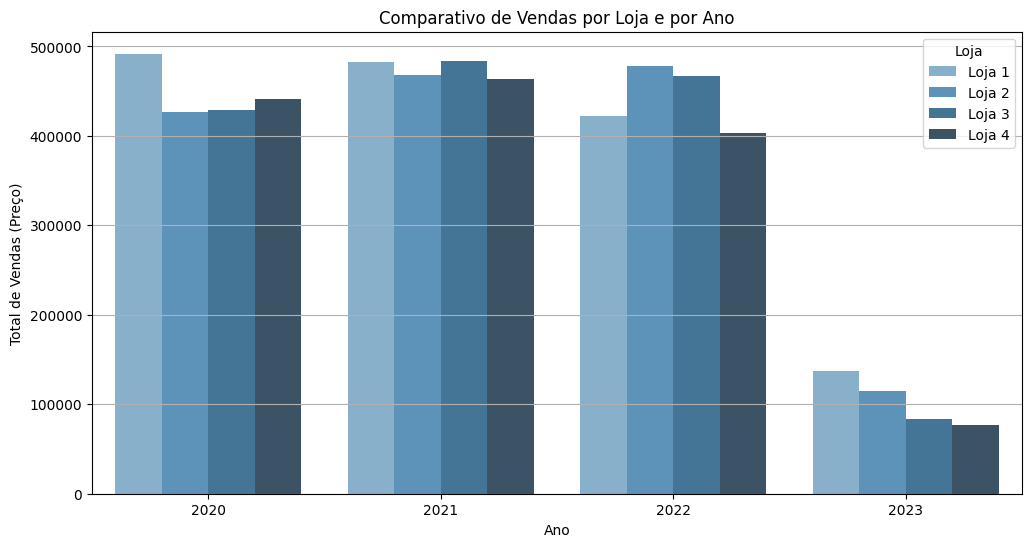

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#grafico de barras para comparar o desempenho das lojas

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_store_year, x='Ano', y='Preço', hue='Loja', palette='Blues_d')
plt.title('Comparativo de Vendas por Loja e por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas (Preço)')
plt.grid(axis='y')
plt.show()